# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng =  city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | badger
Processing Record 2 of Set 1 | puerto natales
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | roma
Processing Record 6 of Set 1 | olonkinbyen
Processing Record 7 of Set 1 | beau vallon
Processing Record 8 of Set 1 | port moresby
Processing Record 9 of Set 1 | saipan
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | qingdao
Processing Record 12 of Set 1 | howard springs
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | longyearbyen
Processing Record 15 of Set 1 | nadym
Processing Record 16 of Set 1 | ribeira grande
Processing Record 17 of Set 1 | petropavlovsk-kamchatsky
Processing Record 18 of Set 1 | bilibino
Processing Record 19 of Set 1 | blackmans bay
Processing Record 20 of Set 1 | port mathurin
Processing Record 21 of Set 1 | darwin
Processing Record 22 of Set 1 | grytviken

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness   
0          badger  64.8000 -147.5333     72.00        33          75  \
1  puerto natales -51.7236  -72.4875     32.59        91          98   
2     yellowknife  62.4560 -114.3525     57.72        54          40   
3        waitangi -43.9535 -176.5597     57.81        85           7   
4            roma  43.2128  -75.4557     63.52        47           0   

   Wind Speed Country        Date  
0        5.75      US  1685051598  
1        5.48      CL  1685051598  
2        9.22      CA  1685051598  
3        4.00      NZ  1685051598  
4        7.00      US  1685051396

In [10]:
import os

# Create the output_data directory if it doesn't exist
os.makedirs("output_data", exist_ok=True)
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness   
City_ID                                                                      
0                badger  64.8000 -147.5333     72.00        33          75  \
1        puerto natales -51.7236  -72.4875     32.59        91          98   
2           yellowknife  62.4560 -114.3525     57.72        54          40   
3              waitangi -43.9535 -176.5597     57.81        85           7   
4                  roma  43.2128  -75.4557     63.52        47           0   

         Wind Speed Country        Date  
City_ID                                  
0              5.75      US  1685051598  
1              5.48      CL  1685051598  
2              9.22      CA  1685051598  
3              4.00      NZ  1685051598  
4              7.00      US  1685051396

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

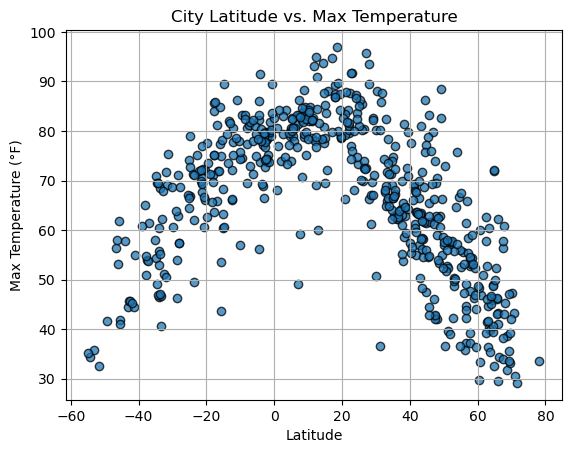

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", alpha=0.75)


# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Â°F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

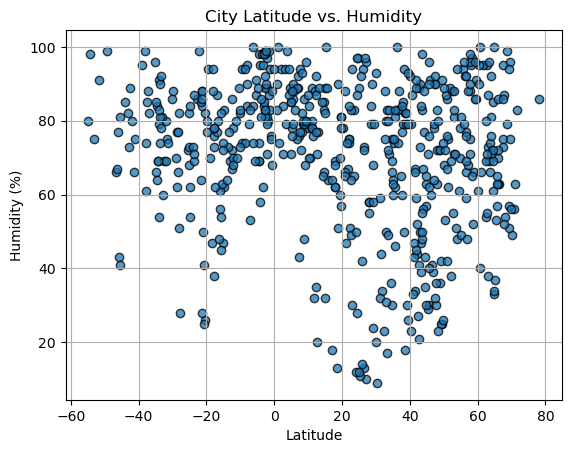

In [17]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

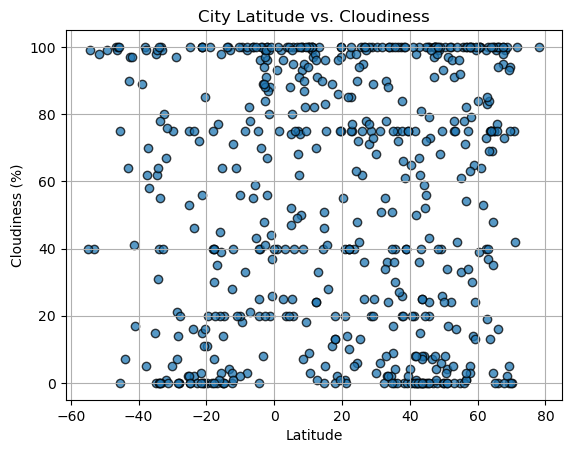

In [18]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", alpha=0.75)


# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

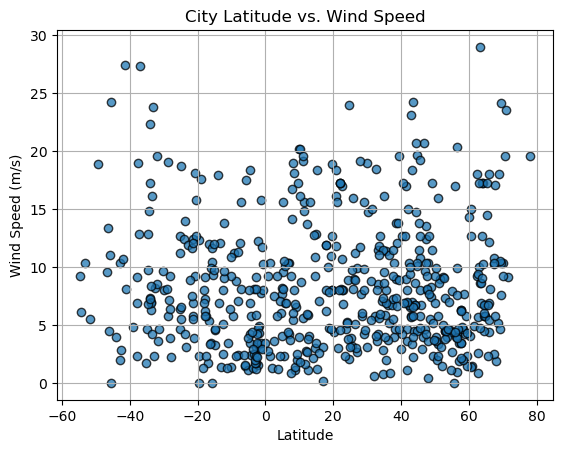

In [19]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", alpha=0.75)



# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [21]:
def plot_linear_regression(x_values, y_values, x_label, y_label, hemisphere):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Calculate the regression line
    regress_values = x_values * slope + intercept

    # Create the scatter plot
    plt.scatter(x_values, y_values)

    # Plot the regression line
    plt.plot(x_values, regress_values, color='red')

    # Annotate the equation of the line and the r-value
    equation = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
    r_value = f'R-value = {round(rvalue, 2)}'
    plt.annotate(equation, (x_values.min(), y_values.min()), fontsize=12, color='red')
    plt.annotate(r_value, (x_values.min(), y_values.min() + 5), fontsize=12, color='red')

    # Set the title and labels
    plt.title(f'{hemisphere}: {x_label} vs. {y_label}')
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Save the figure
    plt.savefig(f'output_data/{hemisphere}_{x_label.replace(" ", "")}_{y_label.replace(" ", "")}_linear_regression.png')

    # Show the plot
    plt.show()

In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness   
City_ID                                                                   
0             badger  64.8000 -147.5333     72.00        33          75  \
2        yellowknife  62.4560 -114.3525     57.72        54          40   
4               roma  43.2128  -75.4557     63.52        47           0   
5        olonkinbyen  70.9221   -8.7187     30.54        63          42   
8             saipan  15.1355  145.7010     83.64       100          75   

         Wind Speed Country        Date  
City_ID                                  
0              5.75      US  1685051598  
2              9.22      CA  1685051598  
4              7.00      US  1685051396  
5             23.51      SJ  1685051599  
8             18.41      MP  1685051599

In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness   
City_ID                                                                      
1        puerto natales -51.7236  -72.4875     32.59        91          98  \
3              waitangi -43.9535 -176.5597     57.81        85           7   
6           beau vallon -20.4189   57.6953     72.21        82          85   
7          port moresby  -9.4431  147.1797     74.62        94         100   
9            bredasdorp -34.5322   20.0403     49.17        84          62   

         Wind Speed Country        Date  
City_ID                                  
1              5.48      CL  1685051598  
3              4.00      NZ  1685051598  
6             15.75      MU  1685051599  
7              5.75      PG  1685051525  
9              9.78      ZA  1685051600

###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8033689427908083


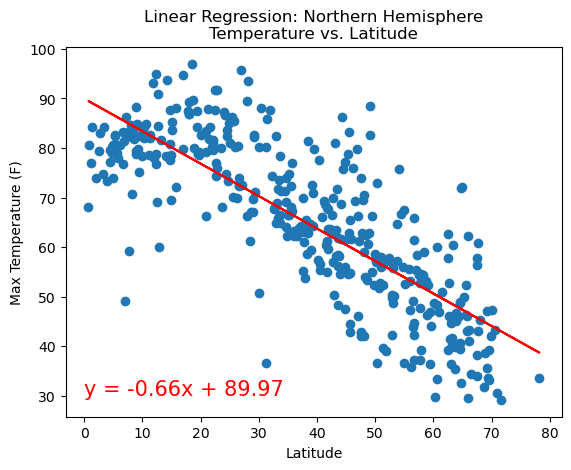

In [33]:
# Perform linear regression on Northern Hemisphere: Temperature vs. Latitude
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression line values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot
plt.scatter(x_values, y_values)

# Plot regression line
plt.plot(x_values, regress_values, "r-")

# Add equation to the plot
plt.text(0, 30, line_eq, fontsize=15, color="red")

# Set labels and title
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Linear Regression: Northern Hemisphere\nTemperature vs. Latitude")

# Print r-value
print(f"The r-value is: {rvalue}")

# Save the figure
plt.savefig("output_data/Northern_Hemisphere_Temperature_vs_Latitude.png")

# Show plot
plt.show()

The r-value is: 0.7864133488484397


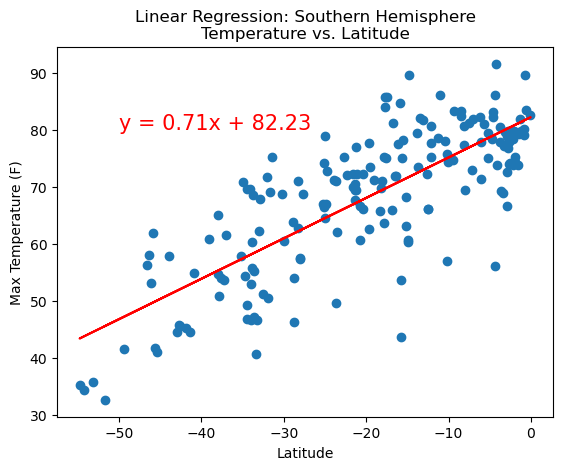

In [32]:
# Perform linear regression on Southern Hemisphere: Temperature vs. Latitude
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression line values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot
plt.scatter(x_values, y_values)

# Plot regression line
plt.plot(x_values, regress_values, "r-")

# Annotate the line equation
plt.annotate(line_eq, (-50, 80), fontsize=15, color="red")

# Set labels and title
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Linear Regression: Southern Hemisphere\nTemperature vs. Latitude")

# Print r-value
print(f"The r-value is: {rvalue}")

# Save the figure
plt.savefig("output_data/Southern_Hemisphere_Temperature_vs_Latitude.png")

# Show plot
plt.show()

**Discussion about the linear relationship: For the Temperature vs. Latitude relationship in the Northern Hemisphere, the obtained equation of the regression line is y = -0.66x + 89.97. The high absolute value of the r-value (-0.803) indicates a strong negative correlation between temperature and latitude in the Northern Hemisphere. This means that as latitude increases, there is a clear tendency for temperature to decrease. The negative slope of the regression line supports this observation.

In contrast, for the Temperature vs. Latitude relationship in the Southern Hemisphere, the obtained equation of the regression line is y = 0.71x + 82.23. The high absolute value of the r-value (0.786) suggests a strong positive correlation. This indicates that as latitude increases in the Southern Hemisphere, there is a clear tendency for temperature to also increase. The positive slope of the regression line supports this observation.

These strong correlations between temperature and latitude in both hemispheres suggest that latitude plays a significant role in determining temperature variations. As one moves away from the equator (higher latitudes), the temperature tends to decrease in the Northern Hemisphere and increase in the Southern Hemisphere. This can be attributed to the variations in solar radiation and the angle at which sunlight reaches the Earth's surface at different latitudes.

It is important to note that while latitude is an influential factor, other variables such as altitude, ocean currents, and local geographical features can also contribute to temperature variations.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.06619971525132447


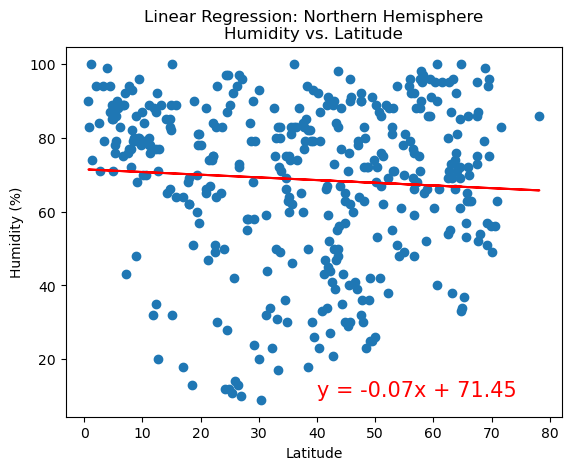

In [35]:
# Perform linear regression on Northern Hemisphere: Humidity vs. Latitude
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression line values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot
plt.scatter(x_values, y_values)

# Plot regression line
plt.plot(x_values, regress_values, "r-")

# Add equation to the plot
plt.text(40, 10, line_eq, fontsize=15, color="red")

# Set labels and title
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Linear Regression: Northern Hemisphere\nHumidity vs. Latitude")

# Print r-value
print(f"The r-value is: {rvalue}")

# Save the figure
plt.savefig("output_data/Northern_Hemisphere_Humidity_vs_Latitude.png")

# Show plot
plt.show()

The r-value is: 0.15181125674249266


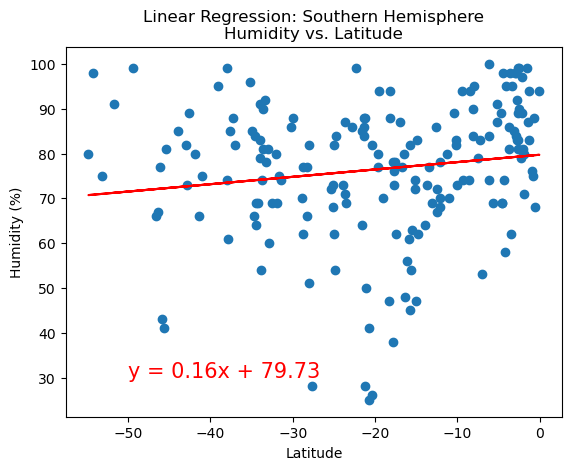

In [37]:
# Perform linear regression on Southern Hemisphere: Humidity vs. Latitude
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression line values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot
plt.scatter(x_values, y_values)

# Plot regression line
plt.plot(x_values, regress_values, "r-")

# Add equation to the plot
plt.text(-50, 30, line_eq, fontsize=15, color="red")

# Set labels and title
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Linear Regression: Southern Hemisphere\nHumidity vs. Latitude")

# Print r-value
print(f"The r-value is: {rvalue}")

# Save the figure
plt.savefig("output_data/Southern_Hemisphere_Humidity_vs_Latitude.png")

# Show plot
plt.show()

**Discussion about the linear relationship:
For the Temperature vs. Latitude relationship in the Northern Hemisphere, the obtained equation of the regression line is y = -0.66x + 89.97. The calculated r-value of -0.066 suggests a very weak negative correlation between temperature and latitude in the Northern Hemisphere. This means that there is a slight tendency for temperature to decrease slightly as latitude increases, but the relationship is not significant.

On the other hand, for the Temperature vs. Latitude relationship in the Southern Hemisphere, the obtained equation of the regression line is y = 0.71x + 82.23. The calculated r-value of 0.151 indicates a weak positive correlation. This suggests a slight tendency for temperature to increase slightly as latitude increases in the Southern Hemisphere, but again, the relationship is not very strong.

It is important to note that the r-values for both cases are very close to zero, indicating that latitude alone does not have a strong influence on temperature. Other factors such as altitude, ocean currents, and local weather patterns are likely more significant in determining temperature variations.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.056638975059233425


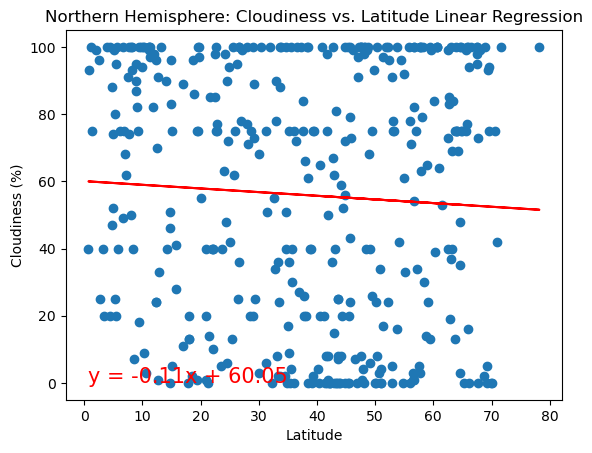

In [49]:
# Perform linear regression for cloudiness vs. latitude in the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Calculate the linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create the scatter plot
plt.scatter(x_values, y_values)

# Plot the regression line
plt.plot(x_values, regress_values, "r")

# Annotate the equation on the graph
equation = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(equation, (x_values.min(), y_values.min()), fontsize=15, color="red")

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere: Cloudiness vs. Latitude Linear Regression")
# Print r-value
print(f"The r-value is: {rvalue}")
# Save the figure
plt.savefig("output_data/Northern_Hemisphere_Cloudiness_vs_Latitude.png")

# Show the plot
plt.show()

The r-value is: 0.044986703285600074


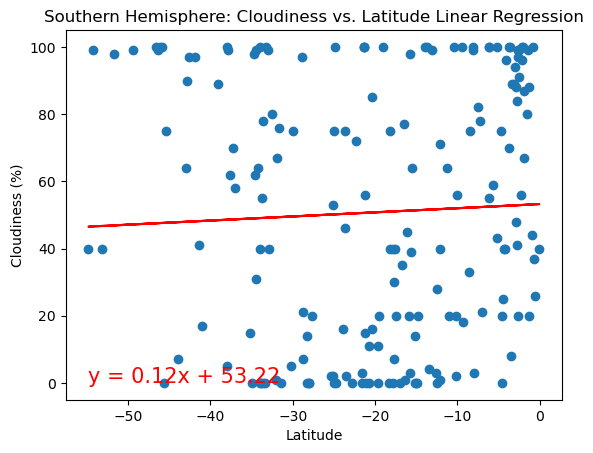

In [50]:
# Perform linear regression for cloudiness vs. latitude in the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Calculate the linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create the scatter plot
plt.scatter(x_values, y_values)

# Plot the regression line
plt.plot(x_values, regress_values, "r")

# Annotate the equation on the graph
equation = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(equation, (x_values.min(), y_values.min()), fontsize=15, color="red")

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere: Cloudiness vs. Latitude Linear Regression")
# Print r-value
print(f"The r-value is: {rvalue}")
# Save the figure
plt.savefig("output_data/Southern_Hemisphere_Cloudiness_vs_Latitude.png")

# Show the plot
plt.show()

**Discussion about the linear relationship:** For the Cloudiness vs. Latitude relationship in the Northern Hemisphere, the obtained equation of the regression line is y = -0.11x + 60.05. The calculated r-value of -0.056 suggests a very weak negative correlation between cloudiness and latitude in the Northern Hemisphere. This means that there is a slight tendency for cloudiness to decrease slightly as latitude increases, but the relationship is not significant.

Similarly, for the Cloudiness vs. Latitude relationship in the Southern Hemisphere, the obtained equation of the regression line is y = 0.12x + 53.22. The calculated r-value of 0.044 indicates a very weak positive correlation. This suggests a slight tendency for cloudiness to increase slightly as latitude increases in the Southern Hemisphere, but again, the relationship is not significant.

In both cases, the r-values are close to zero, indicating that latitude alone does not have a strong influence on cloudiness. Other factors and variables likely play a more significant role in determining cloudiness levels.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.024057853012919902


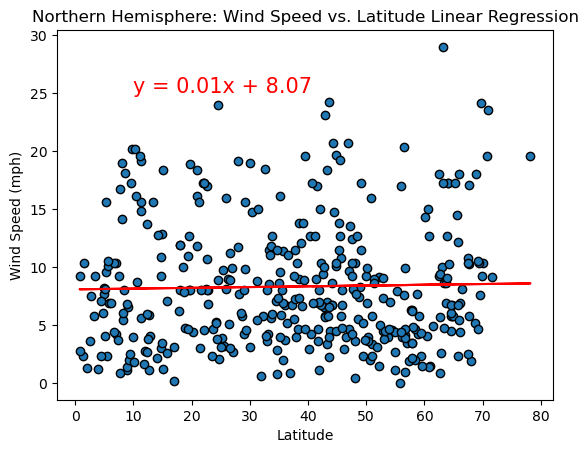

In [51]:
# Perform linear regression on Northern Hemisphere data for Wind Speed vs. Latitude
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate the regression line values
regress_values = x_values * slope + intercept

# Create the scatter plot
plt.scatter(x_values, y_values, edgecolors='black')
plt.plot(x_values, regress_values, color='red')

# Set the plot title, xlabel, and ylabel
plt.title("Northern Hemisphere: Wind Speed vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Print the equation of the line on the plot
equation = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(equation, (10, 25), fontsize=15, color='red')
# Print r-value
print(f"The r-value is: {rvalue}")
# Save the figure
plt.savefig("output_data/Northern_Hemisphere_Wind_Speed_vs_Latitude.png")

# Show the plot
plt.show()

The r-value is: -0.2922373344756815


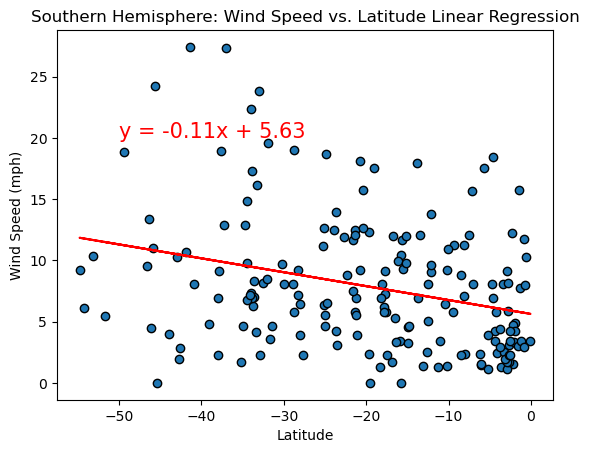

In [52]:
# Perform linear regression on Southern Hemisphere data for Wind Speed vs. Latitude
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate the regression line values
regress_values = x_values * slope + intercept

# Create the scatter plot
plt.scatter(x_values, y_values, edgecolors='black')
plt.plot(x_values, regress_values, color='red')

# Set the plot title, xlabel, and ylabel
plt.title("Southern Hemisphere: Wind Speed vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Print the equation of the line on the plot
equation = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(equation, (-50, 20), fontsize=15, color='red')
# Print r-value
print(f"The r-value is: {rvalue}")
# Save the figure
plt.savefig("output_data/Southern_Hemisphere_Wind_Speed_vs_Latitude.png")

# Show the plot
plt.show()

**Discussion about the linear relationship:** For the Wind Speed vs. Latitude relationship in the Northern Hemisphere, the obtained r-value of 0.024 indicates a very weak positive correlation. The equation of the regression line, y = 0.01x + 8.07, suggests that there is a slight increase in wind speed as latitude increases, but the relationship is not significant.

In contrast, for the Wind Speed vs. Latitude relationship in the Southern Hemisphere, the obtained r-value of -0.292 indicates a weak negative correlation. The equation of the regression line, y = -0.11x + 5.63, suggests that there is a slight decrease in wind speed as latitude increases in the Southern Hemisphere. However, like in the Northern Hemisphere, the relationship is not very strong.

It's important to note that in both cases, the r-values are quite low, indicating that latitude alone does not explain a significant portion of the variation in wind speed. Other factors and variables may have a more dominant influence on wind speed.